# ヒストリカルボラティリティ（Historical Volatility, HV）とは？

ヒストリカルボラティリティ（HV）は、過去の株価データをもとに計算されるボラティリティ（価格変動の大きさ）のことです。これは、過去のリターン（変化率）の標準偏差を使って求められ、一般的には年率換算して表されます。

## 📌 ポイント

- 過去の株価の変動を元に計算する（未来予測ではない）
- リスクの大きさを測る指標として使われる
- 期間によって変化する（10日、30日、90日などで計算可能）
- オプションの価格決定にも影響を与える


# ヒストリカルボラティリティ（Historical Volatility, HV）の計算方法

## 📌 計算手順

ヒストリカルボラティリティ（HV）は、以下の手順で求められます。

### **1. 日次リターンを計算**
- 株価の対数リターン（log return）を求める  
  $
  R_t = \ln\left(\frac{S_t}{S_{t-1}}\right)
  $ 
  - $S_t$ : 時点 $t$ の終値  
  - $S_{t-1}$ : 時点 $t-1$ の終値  

### **2. リターンの標準偏差を計算**
- 計測期間（例えば30日間）の標準偏差を求める  
  $
  \sigma_{\text{daily}} = \text{std}(R)
  $

### **3. 年率換算**
- 日次ボラティリティを年率換算する（252取引日を基準）
  $
  \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252}
  $

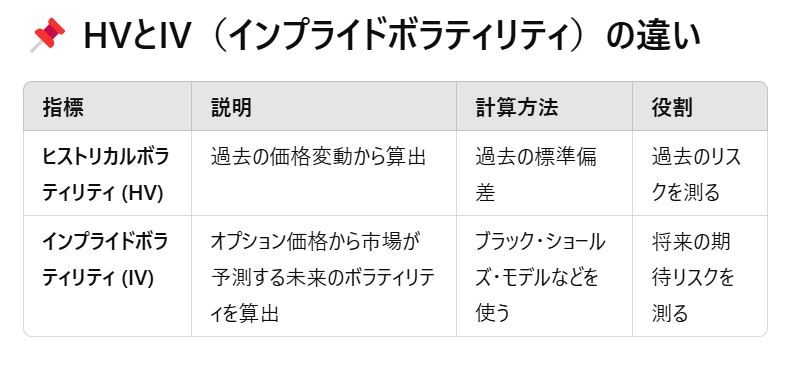

# 📌 どんなときにHVを使うのか？

✅ 過去の株価変動の大きさを知りたいとき

✅ リスク管理（ボラティリティが上昇傾向ならリスクが高まっている）

✅ オプションの売買戦略を考えるとき（IVと比較することで「オプションが割高か割安か」がわかる）

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# S&P 500のデータを取得
ticker = "^GSPC"  # S&P 500のシンボル
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 日次リターンを計算
data["Log Return"] = np.log(data["Close"] / data["Close"].shift(1))

# ヒストリカルボラティリティ（30日間）
window = 30
data["HV_30"] = data["Log Return"].rolling(window=window).std() * np.sqrt(252) * 100  # %

# 最新のHVを表示
print(f"最新のヒストリカルボラティリティ（30日間）: {data['HV_30'].dropna().iloc[-1]:.2f}%")


[*********************100%***********************]  1 of 1 completed

最新のヒストリカルボラティリティ（30日間）: 8.25%


# ヒストリカルボラティリティ（HV）とベータ（β）の関係

ヒストリカルボラティリティ（HV）とベータ（β）は、どちらも金融市場でリスクを測定する指標ですが、それぞれ異なる視点でリスクを捉えています。以下でその関係を詳しく見ていきましょう。

## 📌 ベータ（β）とは？

ベータ（$\beta$）は、**市場全体（例：S&P 500）との連動性**を測る指標です。  
個別銘柄のリターンが市場全体のリターンに対してどれくらい影響を受けるかを数値化したもので、ポートフォリオのリスク管理に広く使われます。

### 🔹 計算式
ベータは、以下の式で計算されます。

$
\beta = \frac{\text{Cov} (R_i, R_m)}{\text{Var} (R_m)}
$

- $R_i$ : 個別銘柄のリターン  
- $R_m$ : 市場（例：S&P 500）のリターン  
- $\text{Cov}$：共分散（銘柄と市場のリターンの関係性）  
- $\text{Var}$：分散（市場のリターンの変動性）

### 🔹 解釈
| ベータ値 ($\beta$) | 意味 |
|------|------|
| $\beta = 1$ | 銘柄は市場と同じ変動をする（市場が10%上がれば、銘柄も10%上がる） |
| $\beta > 1$ | 銘柄は市場よりも変動が大きい（例：テクノロジー株） |
| $\beta < 1$ | 銘柄は市場よりも変動が小さい（例：ディフェンシブ株） |
| $\beta < 0$ | 市場と逆の動きをする（例：ゴールドなど） |

### 🔹 使い方
- **ポートフォリオのリスク管理**  
  高ベータの銘柄はリスクが高いため、市場が下落すると大きく影響を受ける。低ベータの銘柄を組み合わせることでリスクを抑えられる。
- **マーケットセンチメントの分析**  
  ベータが高い銘柄は市場の変動に敏感なので、市場全体の方向性を予測するのに役立つ。

---

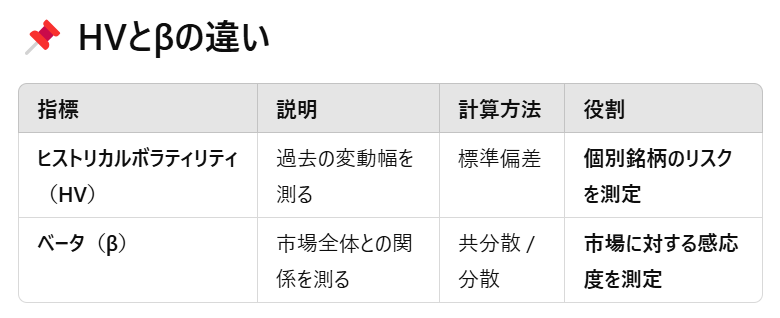

# 📌 HVとβの関係

1. 高ボラティリティ（HV）が高い銘柄は、βも高くなりやすい
価格変動が激しい銘柄（例：テクノロジー株）は、市場全体の動きに対して敏感に反応することが多い。
その結果、市場との相関が強くなり、βも高くなりやすい。

2. ただし、HVが高くてもβが低い場合もある
市場全体とは無関係に動く銘柄（例：ディフェンシブ株、コモディティなど）は、変動が大きくてもβは低いことがある。
例えば、金（GOLD） は市場が下落しても上昇することがあり、HVは高いがβは低い。

3. 低ボラティリティ（HVが低い）でもβが高い場合
安定した値動きの銘柄（例：ディフェンシブ株）が、市場と強い相関を持っていると、HVは低いがβは高くなる ことがある。

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPLのヒストリカルボラティリティ（30日間）: 12.65%
AAPLのベータ: 1.10


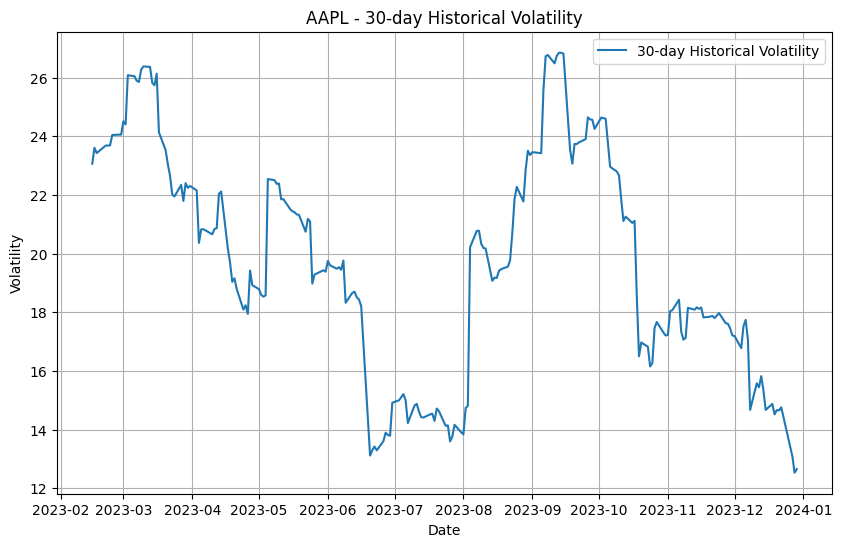

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


# 取得する銘柄
ticker_stock = "AAPL"   # Appleの株
ticker_market = "^GSPC" # S&P 500（市場指標）

# データ取得
start_date = "2023-01-01"
end_date = "2024-01-01"

stock_data = yf.download(ticker_stock, start=start_date, end=end_date)
market_data = yf.download(ticker_market, start=start_date, end=end_date)

# リターン計算
stock_data["Log Return"] = np.log(stock_data["Close"] / stock_data["Close"].shift(1))
market_data["Log Return"] = np.log(market_data["Close"] / market_data["Close"].shift(1))

# ヒストリカルボラティリティ（30日間）
window = 30
stock_data["HV_30"] = stock_data["Log Return"].rolling(window=window).std() * np.sqrt(252) * 100  # %

# ベータの計算
cov_matrix = np.cov(stock_data["Log Return"].dropna(), market_data["Log Return"].dropna())
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# 結果表示
print(f"AAPLのヒストリカルボラティリティ（30日間）: {stock_data['HV_30'].dropna().iloc[-1]:.2f}%")
print(f"AAPLのベータ: {beta:.2f}")

# ヒストリカルボラティリティのプロット
plt.figure(figsize=(10, 6))
plt.plot(stock_data['HV_30'], label='30-day Historical Volatility')
plt.title(f'{ticker_stock} - 30-day Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


# 📌 まとめ

- ヒストリカルボラティリティ（HV） は「過去の変動幅」、ベータ（β） は「市場との相関」を測る指標。
- HVが高いほどβも高くなりやすいが、例外もある（市場と無関係な銘柄など）。
- HVとβを両方確認することで、より正確なリスク評価ができる。
- Pythonを使えば、HVとβを簡単に計算できる。

# 補足：ベータと相関の違い

- 相関係数（$r$）
  - 相関係数は、2つの変数間の線形な関係の強さと方向を示します。
  - $r$の範囲は$-1$から$1$です。$r = 1$は完全な正の相関、$r = -1$は完全な負の相関を意味します。

- ベータ（$\beta$）
  - ベータは、**銘柄のリターンの変動性（リスク）が市場全体のリターンに対してどれくらい影響を受けるかを示す「傾き」** です。
  - ベータは相関を基に計算されますが、**市場の変動性（分散）によってスケーリングされるため、1を超えること**があります。

## Qヒストリカルボラティリティ（30日間） の部分を可視化するよりもベータの値を可視化した方が有意義か？

- 📊 ヒストリカルボラティリティ（30日間）の可視化
  - 目的：個別銘柄やポートフォリオの価格変動の大きさを把握したいとき。
  - 利点：
    - ヒストリカルボラティリティは過去の価格変動を基に計算されるため、実際の市場の動きや不確実性を視覚的に確認することができます。
    - ボラティリティが高い期間はリスクが大きく、低い期間は安定していることが視覚的にわかりやすい。
    - 価格変動が大きい時期を識別し、その後の戦略（例えばヘッジ戦略）を立てるために使えます。
- 📊 ベータの可視化
  - 目的：銘柄の市場との関係性や、市場全体のリスクに対する感度を視覚的に確認したいとき。
  - 利点：
    - ベータは、銘柄のリターンの変動が市場全体のリターンの変動にどれくらい依存しているかを示します。ベータが高い銘柄は市場全体の動きに敏感で、逆に低い銘柄は市場の動きにあまり影響されません。   
    - ポートフォリオのリスク管理において、どの銘柄が市場に対してリスクを多く取っているか、またはどの銘柄が安定性を持っているかを視覚的に把握できます。

💡 どちらが有意義か？
- ポートフォリオリスクの管理や市場の動きに対する感度の分析を重視するのであれば、ベータの可視化が有意義です。特に、ポートフォリオ内の各銘柄がどの程度市場に影響されるかを理解することができます。
- 一方、銘柄やポートフォリオの価格変動の大きさやリスクを重視するのであれば、ヒストリカルボラティリティの可視化が有意義です。
- もし両方を比較したい場合、**両方を並べて可視化することで、リスクと市場との感度を総合的に把握することも可能です。例えば、ベータが高い銘柄はボラティリティも高くなる傾向があるため、その関係性を視覚的に比較することができます。**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFTのヒストリカルボラティリティ（30日間）: 16.53%
MSFTのベータ: 1.18


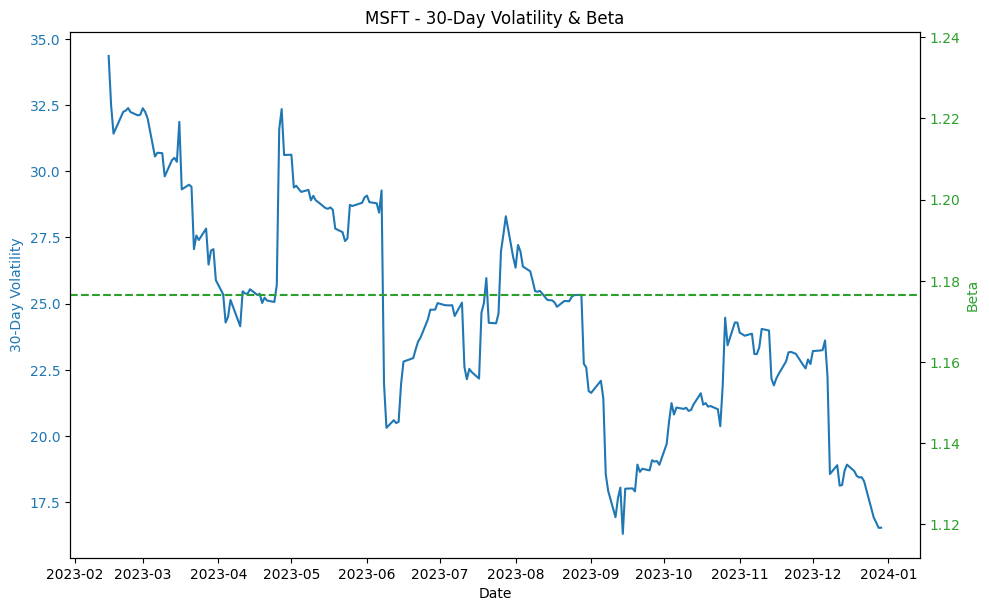

In [13]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# データ取得
ticker_stock = "MSFT"  # 株のシンボル
ticker_market = "^GSPC"  # S&P 500（市場指標）

start_date = "2023-01-01"
end_date = "2024-01-01"

stock_data = yf.download(ticker_stock, start=start_date, end=end_date)
market_data = yf.download(ticker_market, start=start_date, end=end_date)

# リターン計算
stock_data["Log Return"] = np.log(stock_data["Close"] / stock_data["Close"].shift(1))
market_data["Log Return"] = np.log(market_data["Close"] / market_data["Close"].shift(1))

# ヒストリカルボラティリティ（30日間）
stock_data['30d Volatility'] = stock_data['Log Return'].rolling(window=30).std() * np.sqrt(252) * 100

# ベータの計算
cov_matrix = np.cov(stock_data["Log Return"].dropna(), market_data["Log Return"].dropna())
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# 結果表示
print(f"{ticker_stock}のヒストリカルボラティリティ（30日間）: {stock_data['30d Volatility'].dropna().iloc[-1]:.2f}%")
print(f"{ticker_stock}のベータ: {beta:.2f}")

# 可視化
fig, ax1 = plt.subplots(figsize=(10, 6))

# ヒストリカルボラティリティのプロット
ax1.set_xlabel('Date')
ax1.set_ylabel('30-Day Volatility', color='tab:blue')
ax1.plot(stock_data.index, stock_data['30d Volatility'], color='tab:blue', label="30-Day Volatility")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ベータを右側にプロット
ax2 = ax1.twinx()
ax2.set_ylabel('Beta', color='tab:green')
ax2.axhline(y=beta, color='tab:green', linestyle='--', label=f"Beta: {beta:.2f}")
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title(f"{ticker_stock} - 30-Day Volatility & Beta")
plt.show()


# 📊 次に学ぶなら…

βの変動性（Rolling Beta）の分析

HVとIV（インプライドボラティリティ）の比較

HV・βを使ったポートフォリオリスク管理